In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [0]:
np.random.seed(0)

In [145]:
#Labelling Data divided into Training and Validation set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_test.shape)

(10000, 28, 28)


In [0]:
#assert() used to check the initial condition if not true, throws an assertion error
assert(x_train.shape[0] == y_train.shape[0]),"The number of Images is not equal to number of Labels"
assert(x_test.shape[0] == y_test.shape[0]),"The number of Images is not equal to number of Labels"
assert(x_train.shape[1:] == (28,28)),"The dimensions are not 28X28"

(10000, 28, 28)


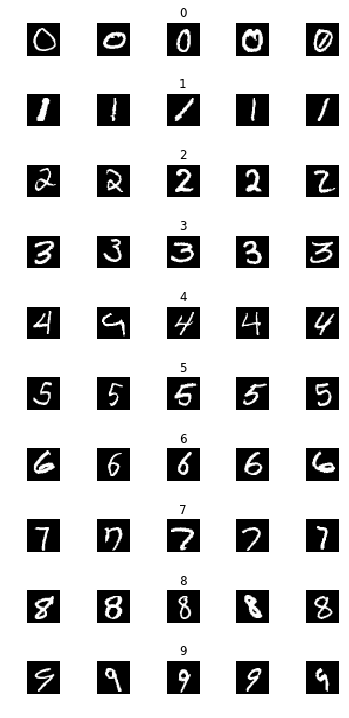

In [147]:
#Arrange the data
n_samples = []
coloumns = 5
n_classes = 10
fig, axs = plt.subplots(nrows = n_classes, ncols = coloumns, figsize = (5,10))
fig.tight_layout()
for i in range(coloumns):
    for j in range(n_classes):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),:,:], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            n_samples.append(len(x_selected))
          
print(x_test.shape)

In [148]:
#Hot encoding

#reshaping it into 3D
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28, 1)



y_train = to_categorical (y_train, num_classes = 10)
y_test = to_categorical (y_test, num_classes = 10)



(10000, 10)


In [0]:
#Normalizing the data to scale down the features and get low variance 
x_train = x_train/255
x_test = x_test/255

In [0]:
#LeNet based model 
def LenNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation ='relu', strides = 1 , padding = 'valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(15, (2,2), activation ='relu', strides = 1 , padding = 'valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    
    
    model.add(Dense(500, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [151]:
model = LenNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 15)        1815      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5010      
Total para

In [152]:
h = model.fit(x_train, y_train, epochs=10, validation_split = 0.1, batch_size=400, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2387 - acc: 0.9270 - val_loss: 0.0509 - val_acc: 0.9837
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0568 - acc: 0.9824 - val_loss: 0.0459 - val_acc: 0.9863
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0429 - acc: 0.9866 - val_loss: 0.0412 - val_acc: 0.9877
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0287 - acc: 0.9903 - val_loss: 0.0432 - val_acc: 0.9882
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0509 - val_acc: 0.9847
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0505 - val_acc: 0.9865
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0242 - acc: 0.9920 - val_loss: 0.0449 - val_acc:

Text(0.5, 0, 'epoch')

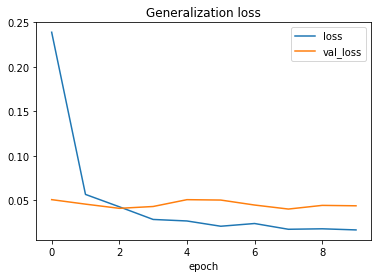

In [153]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Generalization loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

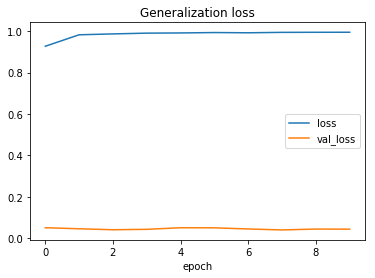

In [154]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Generalization loss')
plt.xlabel('epoch')

In [155]:
#Testing the model with test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:',score[1])

Test score: 0.04718979347113245
Test accuracy: 0.9873


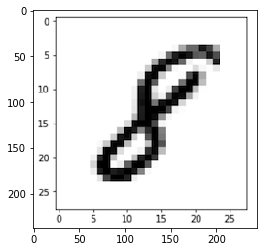

In [156]:
#Testing the model 

import requests
from PIL import Image
#5 number
#url = 'http://neuralnetworksanddeeplearning.com/images/more_data_rotated_5.png'
#8 number
url = 'https://cdn-images-1.medium.com/max/1600/1*nlfLUgHUEj5vW7WVJpxY-g.png'
#2 number
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
test_image = Image.open(response.raw)
plt.imshow(test_image)

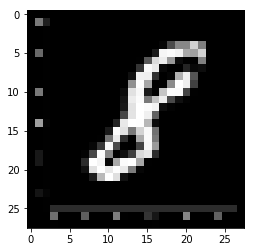

In [157]:
#Converting test image to database image dimensions to compare
import cv2

test_image_array = np.asarray(test_image)
resized = cv2.resize(test_image_array, (28,28))
gray_conv = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
final_test_img = cv2.bitwise_not(gray_conv)
plt.imshow(final_test_img, cmap=plt.get_cmap("gray"))

In [0]:
final_test_img = final_test_img/255
final_test_img = final_test_img.reshape(1, 28,28,1)

In [159]:
prediction = model.predict_classes(final_test_img)
print("Prediction is ", str(prediction))

Prediction is  [8]
